# Breast-Cancer detection using SVM

This is a binary classification dataset called the Breast Cancer Wisconsin
dataset. More information about the data can be found here:
https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

The purpose is to build a classifier using the SVM method as defined in
Chapter 3.

# Step 1: Loading the dataset from sklearn.datasets

In [5]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sns

# This returns a Bunch object (dictionary-like) with data (df) and target
# (series)
cancer_data = load_breast_cancer()
# Declaring variables that contain the data and the target values (np arrays)
X = cancer_data.data
Y = cancer_data.target

# Checking the dataset dimensions
print("Input data size: ", X.shape)
print("Output data size: ", Y.shape)

# Now checking our input column names and our label names:
print("\n Feature names: ", cancer_data.feature_names)
print("\nLabel names: ", cancer_data.target_names)

# And now counting the number of benign and malign samples:
n_pos = (Y==1).sum()
n_neg = (Y==0).sum()

print(f'{n_pos} positive samples and {n_neg} negative samples.')


Input data size:  (569, 30)
Output data size:  (569,)

 Feature names:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Label names:  ['malignant' 'benign']
357 positive samples and 212 negative samples.


We now have some information about the data. But we can do better by pretty
printing our dataset with a mix of Pandas and Seaborn.

In [6]:
# This will return a tuple of DataFrames in the form of (data, target)
cancer_data = load_breast_cancer(return_X_y = True, as_frame = True)

# This splits the dataframes into two different ones (one is a DF, the other
# one is a Series)
X_pd = cancer_data[0]
Y_pd = cancer_data[1]

# Describing the Dataframe
X_pd.describe().style.set_properties(**{'background-color': 'white',
                             'color': 'black',
                             'border-color': 'black'})

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
# Pretty printing the dataframe:
sns.set_theme(style = "whitegrid")

X_pd.head(10).style.set_properties(**{'background-color': 'white',
                             'color': 'black',
                             'border-color': 'black'})

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.990000,10.380000,122.800000,1001.000000,0.118400,0.277600,0.300100,0.147100,0.241900,0.078710,1.095000,0.905300,8.589000,153.400000,0.006399,0.049040,0.053730,0.015870,0.030030,0.006193,25.380000,17.330000,184.600000,2019.000000,0.162200,0.665600,0.711900,0.265400,0.460100,0.118900
1,20.570000,17.770000,132.900000,1326.000000,0.084740,0.078640,0.086900,0.070170,0.181200,0.056670,0.543500,0.733900,3.398000,74.080000,0.005225,0.013080,0.018600,0.013400,0.013890,0.003532,24.990000,23.410000,158.800000,1956.000000,0.123800,0.186600,0.241600,0.186000,0.275000,0.089020
2,19.690000,21.250000,130.000000,1203.000000,0.109600,0.159900,0.197400,0.127900,0.206900,0.059990,0.745600,0.786900,4.585000,94.030000,0.006150,0.040060,0.038320,0.020580,0.022500,0.004571,23.570000,25.530000,152.500000,1709.000000,0.144400,0.424500,0.450400,0.243000,0.361300,0.087580
3,11.420000,20.380000,77.580000,386.100000,0.142500,0.283900,0.241400,0.105200,0.259700,0.097440,0.495600,1.156000,3.445000,27.230000,0.009110,0.074580,0.056610,0.018670,0.059630,0.009208,14.910000,26.500000,98.870000,567.700000,0.209800,0.866300,0.686900,0.257500,0.663800,0.173000
4,20.290000,14.340000,135.100000,1297.000000,0.100300,0.132800,0.198000,0.104300,0.180900,0.058830,0.757200,0.781300,5.438000,94.440000,0.011490,0.024610,0.056880,0.018850,0.017560,0.005115,22.540000,16.670000,152.200000,1575.000000,0.137400,0.205000,0.400000,0.162500,0.236400,0.076780
5,12.450000,15.700000,82.570000,477.100000,0.127800,0.170000,0.157800,0.080890,0.208700,0.076130,0.334500,0.890200,2.217000,27.190000,0.007510,0.033450,0.036720,0.011370,0.021650,0.005082,15.470000,23.750000,103.400000,741.600000,0.179100,0.524900,0.535500,0.174100,0.398500,0.124400
6,18.250000,19.980000,119.600000,1040.000000,0.094630,0.109000,0.112700,0.074000,0.179400,0.057420,0.446700,0.773200,3.180000,53.910000,0.004314,0.013820,0.022540,0.010390,0.013690,0.002179,22.880000,27.660000,153.200000,1606.000000,0.144200,0.257600,0.378400,0.193200,0.306300,0.083680
7,13.710000,20.830000,90.200000,577.900000,0.118900,0.164500,0.093660,0.059850,0.219600,0.074510,0.583500,1.377000,3.856000,50.960000,0.008805,0.030290,0.024880,0.014480,0.014860,0.005412,17.060000,28.140000,110.600000,897.000000,0.165400,0.368200,0.267800,0.155600,0.319600,0.115100
8,13.000000,21.820000,87.500000,519.800000,0.127300,0.193200,0.185900,0.093530,0.235000,0.073890,0.306300,1.002000,2.406000,24.320000,0.005731,0.035020,0.035530,0.012260,0.021430,0.003749,15.490000,30.730000,106.200000,739.300000,0.170300,0.540100,0.539000,0.206000,0.437800,0.107200
9,12.460000,24.040000,83.970000,475.900000,0.118600,0.239600,0.227300,0.085430,0.203000,0.082430,0.297600,1.599000,2.039000,23.940000,0.007149,0.072170,0.077430,0.014320,0.017890,0.010080,15.090000,40.680000,97.650000,711.400000,0.185300,1.058000,1.105000,0.221000,0.436600,0.207500


In [8]:
print("There are a total of: ", Y_pd.count(), "samples")
# Getting the counts of unique values (benign = 1 or malign = 0)
print("The concentration of values in percentages is\n", Y_pd.value_counts
(normalize = True)*100)

There are a total of:  569 samples
The concentration of values in percentages is
 1    62.741652
0    37.258348
Name: target, dtype: float64


# Step 2: Splitting the data into training and testing dataset

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 42)


In [12]:
# Our samples were split into training and testing
Y_train.size, Y_test.size

(426, 143)

# Step 3: Training the model

In [13]:
from sklearn.svm import SVC
# We set up the model to a linear kernel and a standard C penalty value of 1
clf = SVC(kernel = 'linear', C=1.0, random_state = 42)


In [14]:
# Fitting the model
clf.fit(X_train, Y_train, sample_weight = None)


SVC(kernel='linear', random_state=42)

# Predicting and evaluating the model's Accuracy, Precision, Recall and F1 Score

In [17]:
from sklearn.metrics import confusion_matrix

# Making predictions with the testing data
predictions = clf.predict(X_test)

# Printing the confusion matrix
print(confusion_matrix(Y_test, predictions, labels = [0, 1]))

In [20]:
from sklearn.metrics import classification_report
report = classification_report(Y_test, predictions)

print(report)

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        54
           1       0.96      0.98      0.97        89

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143



## ROC Curves
A plot of the true positive rate versus the false positive rate


In [21]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(Y_test, predictions)

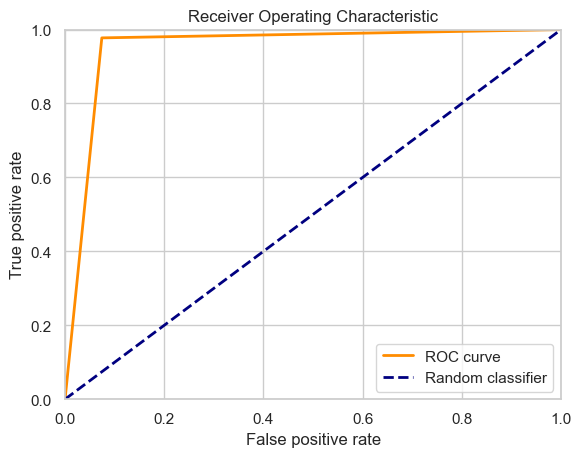

In [26]:
# Plotting the ROC curve using matplotlib
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr, tpr, color = 'darkorange', lw = lw)
plt.plot([0,1],[0,1], color = "navy", lw = lw, linestyle = '--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("Receiver Operating Characteristic")
plt.legend(["ROC curve", "Random classifier"], loc = "lower right")

In [27]:
# Calculating the ROC Score of our model
from sklearn.metrics import roc_auc_score

roc_score = roc_auc_score(Y_test, predictions)
print(f"ROC Score: {roc_score}")

ROC Score: 0.9517270079067831
